
### Objective:
This project aims to classify brain tumors into four categories: glioma tumor, meningioma tumor, no tumor, and pituitary tumor. Using deep learning techniques, the objective is to build a robust image classification model that accurately distinguishes between these types of tumors from MRI scans.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import zipfile
import os
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Dense, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [4]:
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
from warnings import filterwarnings
import os

In [5]:
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set parameters
image_size = (150, 150)
batch_size = 32

# Define the ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # Rescale images

# Load images from directory
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning/Training',  # path to training dataset
    target_size=image_size,        # resize images
    batch_size=batch_size,
    class_mode='categorical'            # use 'categorical' for multi-class classification
)

# Similarly for testing or validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning/Testing',    # path to testing/validation dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [7]:
# Define the ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and augment images from directory
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning/Training',  # path to training dataset
    target_size=image_size,        # resize images
    batch_size=batch_size,
    class_mode='categorical'            # use 'categorical' for multi-class classification
)

# For the validation/testing data, usually, no augmentation is done
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/deep_learning/Testing',    # path to testing/validation dataset
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


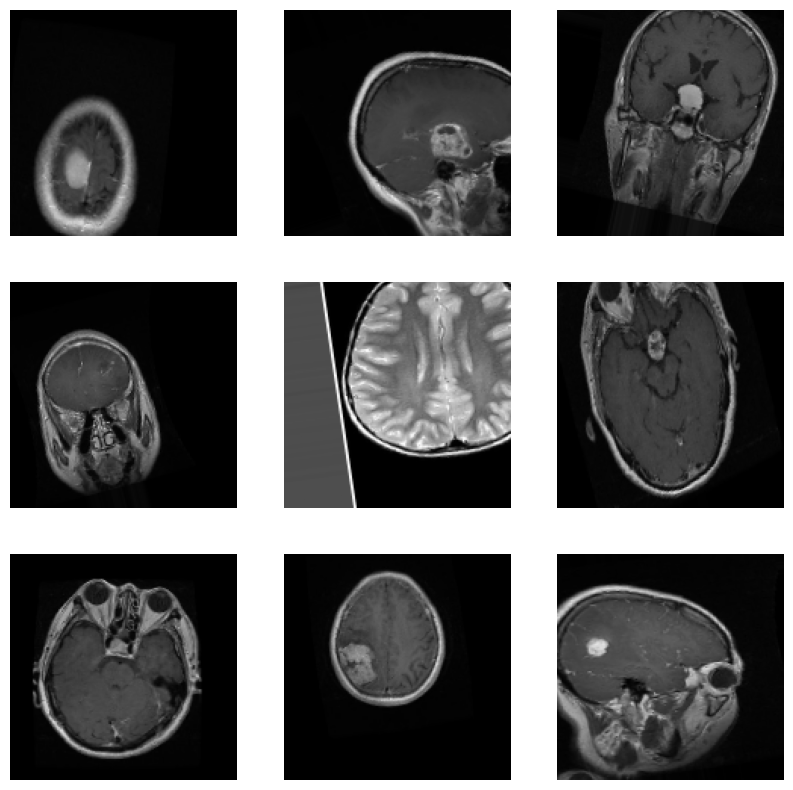

In [8]:
import matplotlib.pyplot as plt

# Get a batch of images and labels
x_batch, y_batch = next(train_generator)

# Plot the first 9 images in the batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()

In [9]:
X_train =[]
y_train =[]
image_size =150
for i in labels :
    folderPath = os.path.join('/content/drive/MyDrive/deep_learning/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels :
    folderPath = os.path.join('/content/drive/MyDrive/deep_learning/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [01:04<00:00,  1.15it/s]


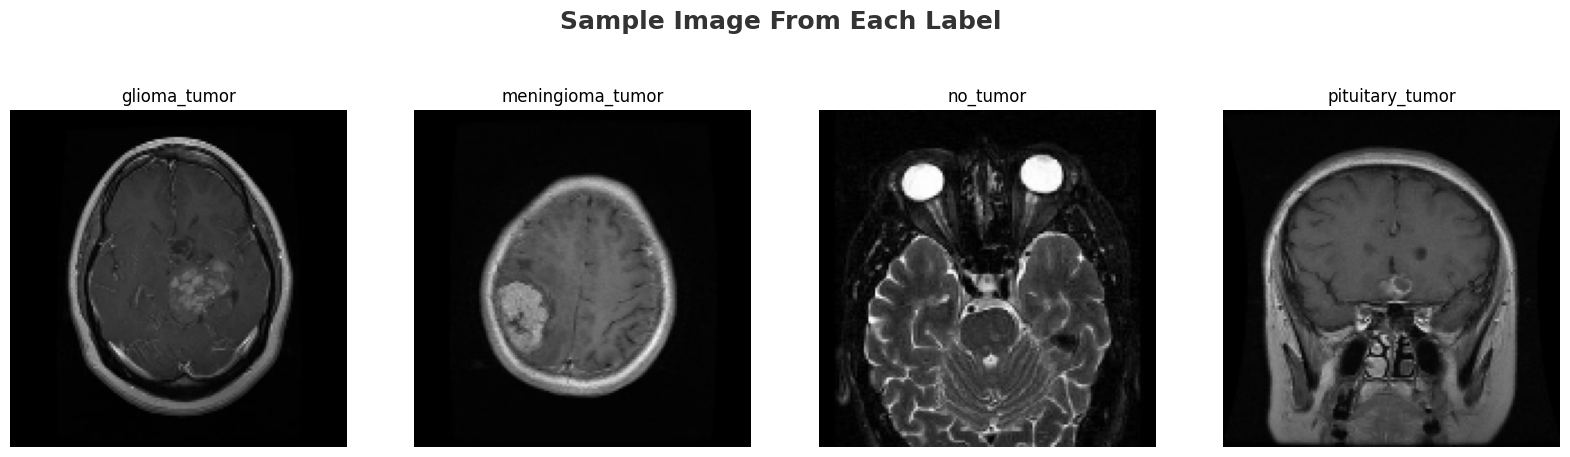

In [10]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [12]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [13]:
X_train.shape


(3264, 150, 150, 3)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [15]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from tensorflow.keras.applications import EfficientNetB0

### Transfer Learning:
Transfer learning involves using a pre-trained model, typically trained on a large dataset like ImageNet, to improve the performance of a new model on a different but related task.
In this project, we'll use a pre-trained model (such as VGG16 or ResNet) to initialize the weights, which helps in faster convergence and better accuracy, especially when training with a smaller dataset.

By freezing the initial layers of the pre-trained model, we leverage the features it has already learned (like detecting edges, shapes, etc.) and then fine-tune the higher-level layers to adapt to our specific brain tumor classification task.
""")

In [17]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [18]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 150, 150, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 150, 150, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 150, 150, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 151, 151, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 75, 75, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 75, 75, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 75, 75, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 75, 75, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 75, 75, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 75, 75, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [20]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [21]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [22]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =12, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.7526 - loss: 0.6383
Epoch 1: val_accuracy improved from -inf to 0.78231, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 138s 756ms/step - accuracy: 0.7536 - loss: 0.6360 - val_accuracy: 0.7823 - val_loss: 0.5661 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9380 - loss: 0.1802
Epoch 2: val_accuracy improved from 0.78231 to 0.89796, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 46s 88ms/step - accuracy: 0.9381 - loss: 0.1801 - val_accuracy: 0.8980 - val_loss: 0.2865 - learning_rate: 0.0010
Epoch 3/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9704 - loss: 0.0945
Epoch 3: val_accuracy did not improve from 0.89796
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.9703 - loss: 0.0948 - val_accuracy: 0.8197 - val_loss: 0.5187 - learning_rate: 0.0010
Epoch 4/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9737 - loss: 0.0760
Epoch 4: val_accu

In [23]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 686ms/step


In [24]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        93
           1       0.94      0.98      0.96        95
           2       1.00      1.00      1.00        52
           3       0.99      1.00      0.99        87

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.98      0.98      0.98       327



In [25]:

def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)  # Load image with the target size
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from PIL import Image
import io


# Function to predict using the model
def predict_brain_tumor(img):
    img_array = preprocess_image(img)

    # Make prediction
    prediction = model.predict(img_array)

    labels = ['glioma tumor', 'meningioma tumor', 'no tumor', 'pituitary tumor']

    # Get the class with the highest probability
    predicted_class = labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    print(f"Predicted Tumor Type: {predicted_class} with {confidence*100:.2f}% confidence")

    # Display the input image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to handle image upload and prediction
def on_upload_change(change):
    file = list(change['new'].values())[0]  # Access the first uploaded file
    content = file['content']  # Access the content of the file
    img = Image.open(io.BytesIO(content))  # Convert to an image
    predict_brain_tumor(img)

# Create an upload button
upload_button = widgets.FileUpload(
    accept='image/*',  # Accept only image files
    multiple=False  # Single file only
)

# Add event listener to the upload button
upload_button.observe(on_upload_change, names='value')

# Display the upload button
display(upload_button)
